### ML Model Evaluation Non-Nested and Nested CV with GridSearchCV and RandomizedSearchCV With StratifiedKFold

In [28]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [29]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


In [30]:
# Construct dataset
X_1, y_1 = make_gaussian_quantiles(n_samples= 1000,
                                 n_features=10,
                                 n_classes=2,
                                 )

# transform the dataset
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X1, y1 = ros.fit_resample(X_1, y_1)



X1 = pd.DataFrame(X1,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
y1 = pd.Series(y1)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,
                                              test_size=0.25,
                                              random_state=1)

In [32]:
model1 = LogisticRegression(random_state=1)
model2 = SVC(kernel= "rbf")
model3 = DecisionTreeClassifier(random_state=1)
model4 = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
model5 = KNeighborsClassifier(n_neighbors=5)
model6  = RandomForestClassifier(random_state=1)                              


In [33]:

#Logistic regression 
opti_grid_para1 = {"C": [0.01, 0.1, 1, 10, 100],
                  "random_state": [1]}
#SVM
opti_grid_para2 = {"C": [0.01, 0.1, 1, 10, 100],
                  "gamma": [0.01, 0.1, 1, 10, 100]}
#Decision-tree 
opti_grid_para3 = {'max_leaf_nodes': list(range(2, 50)), 
                  'min_samples_split': [2, 3, 4]}
#Gradient Boosting
opti_grid_para4 = dict(
    n_estimators=[100, 500],
    max_depth=[1, 2, 3]
)
#K-Nearest Neighbors
opti_grid_para5 = [{'n_neighbors': list(range(1, 10)),
                     'p': [1, 2]}]
# Random Forest
opti_grid_para6 = [{'n_estimators': [10, 100, 500]}]

In [34]:
num_of_trials = 10
X1_data = X_train
y1_target = y_train

In [35]:
nested_scores_lr = np.zeros(num_of_trials)
nested_scores_svc = np.zeros(num_of_trials)
nested_scores_dt = np.zeros(num_of_trials)
nested_scores_gb = np.zeros(num_of_trials)
nested_scores_knn = np.zeros(num_of_trials)
nested_scores_rf = np.zeros(num_of_trials)
non_nested_scores_lr = np.zeros(num_of_trials)
non_nested_scores_svc = np.zeros(num_of_trials)
non_nested_scores_dt = np.zeros(num_of_trials)
non_nested_scores_gb = np.zeros(num_of_trials)
non_nested_scores_knn = np.zeros(num_of_trials)
non_nested_scores_rf = np.zeros(num_of_trials)

In [36]:
for i in range(num_of_trials):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    model_lr = GridSearchCV(estimator=model1, param_grid=opti_grid_para1, cv=outer_cv)
    model_svc = GridSearchCV(estimator=model2, param_grid=opti_grid_para2, cv=outer_cv)
    model_dt = GridSearchCV(estimator=model3, param_grid=opti_grid_para3, cv=outer_cv)
    model_gb = GridSearchCV(estimator=model4, param_grid=opti_grid_para4, cv=outer_cv)
    model_knn = GridSearchCV(estimator=model5, param_grid=opti_grid_para5, cv=outer_cv)
    model_rf = GridSearchCV(estimator=model6, param_grid=opti_grid_para6, cv=outer_cv)
    #clf.fit(X1_data, y1_target)
    model_lr.fit(X1_data, y1_target)
    model_svc.fit(X1_data, y1_target)
    model_dt.fit(X1_data, y1_target)
    model_gb.fit(X1_data, y1_target)
    model_knn.fit(X1_data, y1_target)
    model_rf.fit(X1_data, y1_target)

    non_nested_scores_lr[i] = model_lr.best_score_
    non_nested_scores_svc[i] = model_svc.best_score_
    non_nested_scores_dt[i] = model_dt.best_score_
    non_nested_scores_gb[i] = model_gb.best_score_
    non_nested_scores_knn[i] = model_knn.best_score_
    non_nested_scores_rf[i] = model_rf.best_score_

    # Nested CV with parameter optimization
    model_lr = GridSearchCV(estimator=model1, param_grid=opti_grid_para1, cv=inner_cv)
    model_svc = GridSearchCV(estimator=model2, param_grid=opti_grid_para2, cv=inner_cv)
    model_dt = GridSearchCV(estimator=model3, param_grid=opti_grid_para3, cv=inner_cv)
    model_gb = GridSearchCV(estimator=model4, param_grid=opti_grid_para4, cv=inner_cv)
    model_knn = GridSearchCV(estimator=model5, param_grid=opti_grid_para5, cv=inner_cv)
    model_rf = GridSearchCV(estimator=model6, param_grid=opti_grid_para6, cv=inner_cv)
    #clf = GridSearchCV(estimator=model6, param_grid=opti_grid_para6, cv=inner_cv)
    #nested_score_1 = cross_val_score(clf, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_lr = cross_val_score(model_lr, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_svc = cross_val_score(model_svc, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_dt = cross_val_score(model_dt, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_gb = cross_val_score(model_gb, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_knn = cross_val_score(model_knn, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_rf = cross_val_score(model_rf, X=X1_data, y=y1_target, cv=outer_cv)
    #nested_scores_1[i] = nested_score_1.mean()
    nested_scores_lr[i] = nested_scores_lr.mean()
    nested_scores_svc[i] = nested_scores_svc.mean()
    nested_scores_dt[i] = nested_scores_dt.mean()
    nested_scores_gb[i] = nested_scores_gb.mean()
    nested_scores_knn[i] = nested_scores_knn.mean()
    nested_scores_rf[i] = nested_scores_rf.mean()

In [37]:
print(nested_scores_lr, non_nested_scores_lr)

[0.48       0.41333333 0.64       0.53333333 0.54666667 0.56
 0.48       0.53333333 0.52       0.52533333] [0.524      0.52       0.52933333 0.52       0.50666667 0.51333333
 0.516      0.52533333 0.53466667 0.53066667]


In [38]:
print(nested_scores_svc, non_nested_scores_svc)

[0.94666667 0.93333333 0.93333333 0.96       0.97333333 0.97333333
 0.96       0.96       1.         0.95866667] [0.95866667 0.948      0.952      0.95333333 0.95333333 0.95466667
 0.95733333 0.95066667 0.95866667 0.96266667]


In [39]:
print(nested_scores_dt, non_nested_scores_dt)

[0.77333333 0.77333333 0.70666667 0.82666667 0.77333333 0.72
 0.77333333 0.8        0.77333333 0.768     ] [0.752      0.768      0.748      0.744      0.748      0.76
 0.752      0.74533333 0.74666667 0.768     ]


In [40]:
print(nested_scores_gb, non_nested_scores_gb)

[0.86666667 0.89333333 0.90666667 0.92       0.97333333 0.94666667
 0.94666667 0.92       0.89333333 0.92      ] [0.924      0.93333333 0.932      0.93866667 0.912      0.93066667
 0.936      0.928      0.93333333 0.92      ]


In [41]:
print(nested_scores_knn, non_nested_scores_knn)

[0.77333333 0.68       0.74666667 0.74666667 0.64       0.72
 0.64       0.76       0.66666667 0.70666667] [0.68666667 0.692      0.68       0.69333333 0.69333333 0.688
 0.70133333 0.69466667 0.68533333 0.70666667]


In [42]:
print(nested_scores_rf, non_nested_scores_rf)

[0.85333333 0.81333333 0.77333333 0.88       0.8        0.82666667
 0.84       0.86666667 0.86666667 0.83733333] [0.84266667 0.83866667 0.84266667 0.85733333 0.83866667 0.85866667
 0.848      0.84666667 0.86133333 0.84133333]


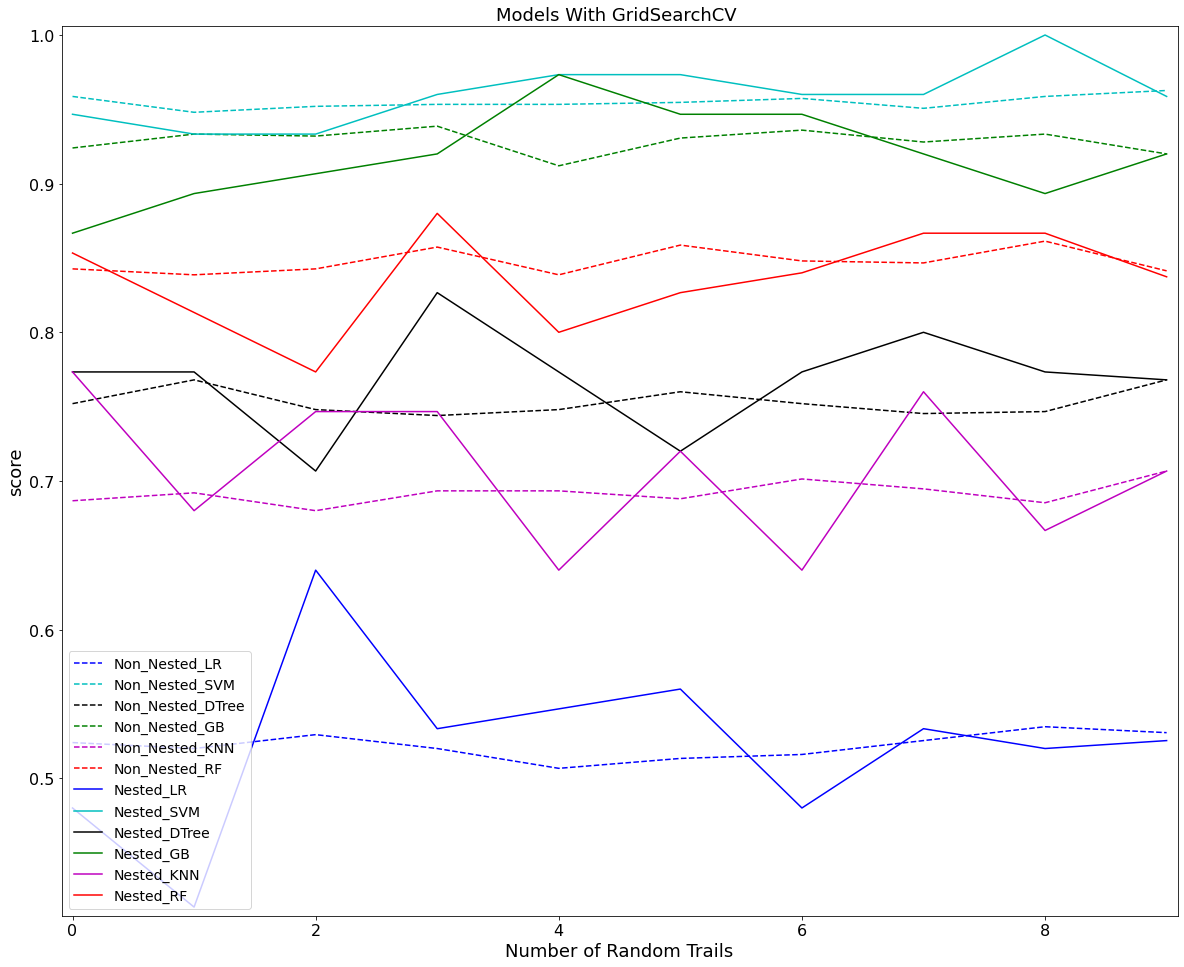

In [43]:
plt.figure(figsize=(20, 36))

ax = plt.subplot(211)
ax.margins(0.01)
plt.title('Models With GridSearchCV ', fontsize="18")
(non_nested_scores_line_lr,) = ax.plot(non_nested_scores_lr, color="b", linestyle="--", label="Non_Nested_LR")
(non_nested_scores_line_svc,) = ax.plot(non_nested_scores_svc, color="c", linestyle="--", label="Non_Nested_SVM")
(non_nested_scores_line_dt,) = ax.plot(non_nested_scores_dt, color="k", linestyle="--", label="Non_Nested_DTree")
(non_nested_scores_line_gb,) = ax.plot(non_nested_scores_gb, color="g", linestyle="--", label="Non_Nested_GB")
(non_nested_scores_line_knn,) = ax.plot(non_nested_scores_knn, color="m", linestyle="--", label="Non_Nested_KNN")
(non_nested_scores_line_rf,) = ax.plot(non_nested_scores_rf, color="r", linestyle="--", label="Non_Nested_RF")
(nested_line_lr,) = ax.plot(nested_scores_lr, color="b", label="Nested_LR")
(nested_line_svc,) = ax.plot(nested_scores_svc, color="c", label="Nested_SVM" )
(nested_line_dt,) = ax.plot(nested_scores_dt, color="k", label="Nested_DTree" )
(nested_line_gb,) = ax.plot(nested_scores_gb, color="g", label="Nested_GB" )
(nested_line_knn,) = ax.plot(nested_scores_knn, color="m", label="Nested_KNN" )
(nested_line_rf,) = ax.plot(nested_scores_rf, color="r", label="Nested_RF" )
plt.ylabel("score", fontsize="18")
plt.xlabel("Number of Random Trails", fontsize="18")
plt.xticks(fontsize = "16")
plt.yticks(fontsize = "16")
ax.legend(fontsize= "14")

In [47]:
for i in range(num_of_trials):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    model_lr = RandomizedSearchCV(estimator=model1, param_distributions=opti_grid_para1, cv=outer_cv)
    model_svc = RandomizedSearchCV(estimator=model2, param_distributions=opti_grid_para2, cv=outer_cv)
    model_dt = RandomizedSearchCV(estimator=model3, param_distributions=opti_grid_para3, cv=outer_cv)
    model_gb = RandomizedSearchCV(estimator=model4, param_distributions=opti_grid_para4, cv=outer_cv)
    model_knn = RandomizedSearchCV(estimator=model5, param_distributions=opti_grid_para5, cv=outer_cv)
    model_rf = RandomizedSearchCV(estimator=model6, param_distributions=opti_grid_para6, cv=outer_cv)

    #clf.fit(X1_data, y1_target)
    model_lr.fit(X1_data, y1_target)
    model_svc.fit(X1_data, y1_target)
    model_dt.fit(X1_data, y1_target)
    model_gb.fit(X1_data, y1_target)
    model_knn.fit(X1_data, y1_target)
    model_rf.fit(X1_data, y1_target)

    non_nested_scores_lr[i] = model_lr.best_score_
    non_nested_scores_svc[i] = model_svc.best_score_
    non_nested_scores_dt[i] = model_dt.best_score_
    non_nested_scores_gb[i] = model_gb.best_score_
    non_nested_scores_knn[i] = model_knn.best_score_
    non_nested_scores_rf[i] = model_rf.best_score_

    # Nested CV with parameter optimization
    model_lr = RandomizedSearchCV(estimator=model1, param_distributions=opti_grid_para1, cv=inner_cv)
    model_svc = RandomizedSearchCV(estimator=model2, param_distributions=opti_grid_para2, cv=inner_cv)
    model_dt = RandomizedSearchCV(estimator=model3, param_distributions=opti_grid_para3, cv=inner_cv)
    model_gb = RandomizedSearchCV(estimator=model4, param_distributions=opti_grid_para4, cv=inner_cv)
    model_knn = RandomizedSearchCV(estimator=model5, param_distributions=opti_grid_para5, cv=inner_cv)
    model_rf = RandomizedSearchCV(estimator=model6, param_distributions=opti_grid_para6, cv=inner_cv)

    nested_scores_lr = cross_val_score(model_lr, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_svc = cross_val_score(model_svc, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_dt = cross_val_score(model_dt, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_gb = cross_val_score(model_gb, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_knn = cross_val_score(model_knn, X=X1_data, y=y1_target, cv=outer_cv)
    nested_scores_rf = cross_val_score(model_rf, X=X1_data, y=y1_target, cv=outer_cv)
    #nested_scores_1[i] = nested_score_1.mean()
    nested_scores_lr[i] = nested_scores_lr.mean()
    nested_scores_svc[i] = nested_scores_svc.mean()
    nested_scores_dt[i] = nested_scores_dt.mean()
    nested_scores_gb[i] = nested_scores_gb.mean()
    nested_scores_knn[i] = nested_scores_knn.mean()
    nested_scores_rf[i] = nested_scores_rf.mean()

In [48]:
print(nested_scores_lr, non_nested_scores_lr)

[0.48       0.41333333 0.64       0.53333333 0.54666667 0.56
 0.48       0.53333333 0.52       0.52533333] [0.524      0.52       0.52933333 0.52       0.50666667 0.51333333
 0.516      0.52533333 0.53466667 0.53066667]


In [49]:
print(nested_scores_svc, non_nested_scores_svc)

[0.96       0.93333333 0.97333333 0.96       0.90666667 0.97333333
 0.96       0.96       0.98666667 0.95466667] [0.95866667 0.944      0.93733333 0.95066667 0.95333333 0.94266667
 0.93733333 0.95066667 0.95866667 0.956     ]


In [50]:
print(nested_scores_dt, non_nested_scores_dt)

[0.78666667 0.74666667 0.69333333 0.81333333 0.78666667 0.72
 0.76       0.73333333 0.77333333 0.756     ] [0.752      0.76533333 0.74533333 0.74133333 0.74666667 0.76
 0.752      0.73866667 0.74666667 0.76533333]


In [51]:
print(nested_scores_gb, non_nested_scores_gb)

[0.86666667 0.89333333 0.90666667 0.92       0.97333333 0.94666667
 0.94666667 0.92       0.89333333 0.92      ] [0.924      0.93333333 0.932      0.93866667 0.912      0.93066667
 0.936      0.928      0.93333333 0.92      ]


In [52]:
print(nested_scores_knn, non_nested_scores_knn)

[0.77333333 0.68       0.65333333 0.66666667 0.6        0.72
 0.61333333 0.76       0.66666667 0.68266667] [0.68666667 0.692      0.65733333 0.69333333 0.65466667 0.688
 0.66266667 0.656      0.65866667 0.67333333]


In [53]:
print(nested_scores_rf, non_nested_scores_rf)

[0.85333333 0.81333333 0.77333333 0.88       0.8        0.82666667
 0.84       0.86666667 0.86666667 0.83733333] [0.84266667 0.83866667 0.84266667 0.85733333 0.83866667 0.85866667
 0.848      0.84666667 0.86133333 0.84133333]


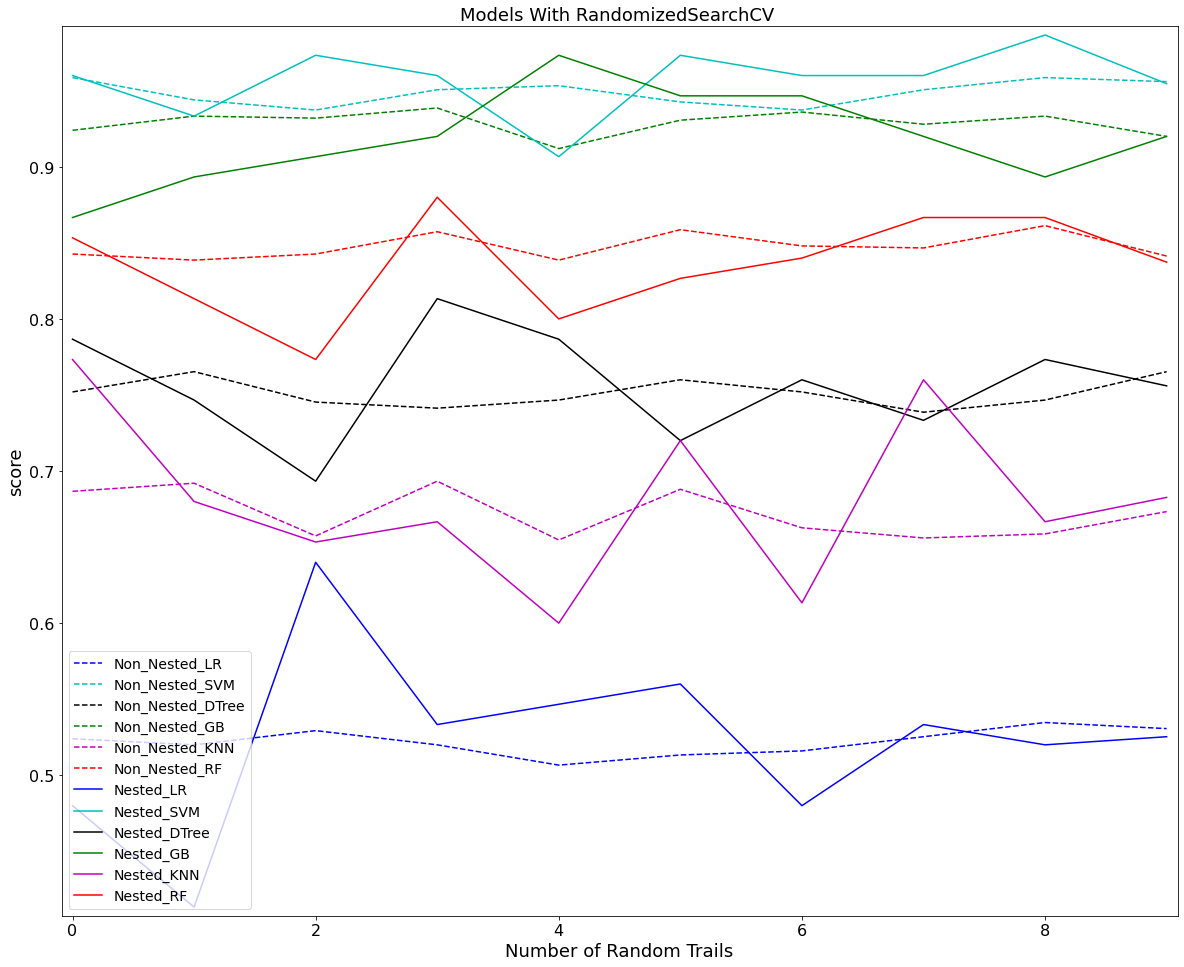

In [54]:
plt.figure(figsize=(20, 36))

ax = plt.subplot(211)
ax.margins(0.01)
plt.title('Models With RandomizedSearchCV ', fontsize="18")
(non_nested_scores_line_lr,) = ax.plot(non_nested_scores_lr, color="b", linestyle="--", label="Non_Nested_LR")
(non_nested_scores_line_svc,) = ax.plot(non_nested_scores_svc, color="c", linestyle="--", label="Non_Nested_SVM")
(non_nested_scores_line_dt,) = ax.plot(non_nested_scores_dt, color="k", linestyle="--", label="Non_Nested_DTree")
(non_nested_scores_line_gb,) = ax.plot(non_nested_scores_gb, color="g", linestyle="--", label="Non_Nested_GB")
(non_nested_scores_line_knn,) = ax.plot(non_nested_scores_knn, color="m", linestyle="--", label="Non_Nested_KNN")
(non_nested_scores_line_rf,) = ax.plot(non_nested_scores_rf, color="r", linestyle="--", label="Non_Nested_RF")
(nested_line_lr,) = ax.plot(nested_scores_lr, color="b", label="Nested_LR")
(nested_line_svc,) = ax.plot(nested_scores_svc, color="c", label="Nested_SVM" )
(nested_line_dt,) = ax.plot(nested_scores_dt, color="k", label="Nested_DTree" )
(nested_line_gb,) = ax.plot(nested_scores_gb, color="g", label="Nested_GB" )
(nested_line_knn,) = ax.plot(nested_scores_knn, color="m", label="Nested_KNN" )
(nested_line_rf,) = ax.plot(nested_scores_rf, color="r", label="Nested_RF" )
plt.ylabel("score", fontsize="18")
plt.xlabel("Number of Random Trails", fontsize="18")
plt.xticks(fontsize = "16")
plt.yticks(fontsize = "16")
ax.legend(fontsize= "14")